# Lab 1: Matrix and vector calculations

## 1. Introduction to Sage

In this course we will be using [SageMath](https://www.sagemath.org/) which is a software system for mathematics, built on top of Python and many other open-source packages.

If you are already familiar with Python, then you should not find too many differences. If you have not worked with Python before, don't worry as we will explain things as we go.

The following book is a good source if you would like to read more about using Sage -- at times, we will refer to specific sections that you might find useful (e.g. to read up more on a specific function that we use), but you will also find much more in the book than we will cover in this course (e.g. on topics like calculus and differential equations).

* [Computational Mathematics with SageMath](http://sagebook.gforge.inria.fr/english.html) -- book with free PDF available


### Solving equations

Let's start by solving a basic equation, like $2x=1$:

In [1]:
solve(2*x == 1, x)

[x == (1/2)]

This works as expected, but note that we run in to a problem if we try to solve $2t=1$ instead:

In [2]:
solve(2*t == 1, t)

NameError: name 't' is not defined

This error is because Sage requires you to declare in advance the names of all variables before using them -- the error message tells us that ("name 't' is not defined"). It worked with `x` just because Sage automatically recognises that one. To use any other letter, you need to declare the variable first, like so:

In [3]:
t = var('t')
solve(2*t == 1, t)

[t == (1/2)]

### Plotting

One of the strengths of computational mathematics is being able to plot functions and other visualisations. Sage has quite good plotting capabilities -- we will return to this later in the lab (and in future labs) but for now here are a couple of examples of what we can do:

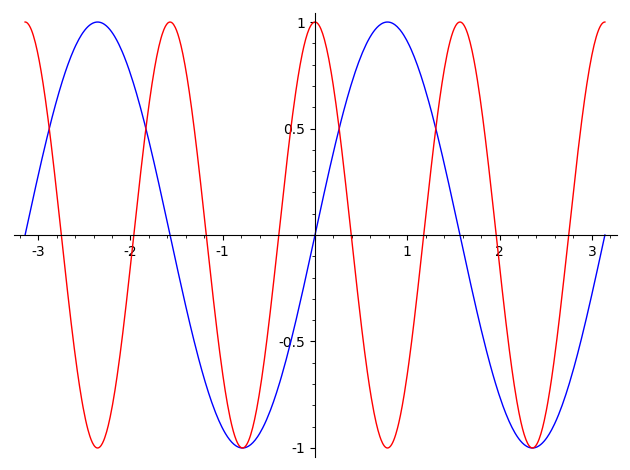

In [4]:
plot(sin(2*x), x, -pi, pi) + plot(cos(4*x), x, -pi, pi, color = 'red')

Notice that we were able to "add" two plots together to superimpose them on one picture.

Sage can also produce 3d plots:

In [5]:
var('x y')
p1 = plot3d(sin(pi*sqrt(x^2 + y^2))/sqrt(x^2+y^2), (x,-5,5), (y,-5,5))
p1.show(viewer='threejs')

Graphics3d Object

Here, we specified that `x` and `y` are variables (notice that you can do it in this abbreviated way), then used `plot3d` to produce the plot and store it as the variable `p1`. We then used `p1.show(viewer='threejs')` to make the plot display in an interactive format -- you can use the scroll wheel to zoom in and out, and the mouse to rotate the view.

### More complicated objects

A real strength of Sage compared with other tools is that it has been designed with sophisticated knowledge of mathematical objects built in. This makes it a powerful tool for doing calculations -- but the tradeoff for all that power is that you need to be precise in the way you use the objects, and sometimes the details can seem quite technical. We'll try to address those as we go.

The rest of this lab will focus on working with matrices and vectors, so let's start by looking at what Sage can do with matrices.




In [6]:
M = Matrix(ZZ, 3, 3, [1,0,1, 0,1,1, 1,1,0])
M

[1 0 1]
[0 1 1]
[1 1 0]

This says "make the variable M stand for the $3\times3$ matrix over the integers (`ZZ`=$\mathbf{Z}$) with entries given in this big list".

We can see that M is a matrix object:

In [7]:
type(M)

<type 'sage.matrix.matrix_integer_dense.Matrix_integer_dense'>

For a bit more detail, we can ask Sage what is the `parent()` of the object, meaning "what type of thing is it?":

In [8]:
M.parent()

Full MatrixSpace of 3 by 3 dense matrices over Integer Ring

We can also make the output look a bit nicer using `pretty_print`:

In [9]:
pretty_print(M)

[1 0 1]
[0 1 1]
[1 1 0]

And in fact we can make this the default way of displaying the output throughout the notebook:

In [10]:
%display latex

In [11]:
M1 = Matrix(ZZ, 3, 4, [1,3,0,1, 2,2,1,2, 4,6,1,8])
M1

[1 3 0 1]
[2 2 1 2]
[4 6 1 8]

The matrix `M1` is the augmented matrix appearing on p2 of the lecture notes. We'll return to that in the next section.

First, let's look at what Sage can tell us about `M`.

Now that we have `%display latex` in effect, the type of the objects also appears in a more readable form:

In [12]:
M.parent()

Full MatrixSpace of 3 by 3 dense matrices over Integer Ring

We can compute the eigenvalues and eigenvectors of the matrix:

In [13]:
M.eigenvectors_right()

[(2, [
  (1, 1, 1)
  ], 1), (1, [
  (1, -1, 0)
  ], 1), (-1, [
  (1, 1, -2)
  ], 1)]

This output is quite complicated but is [explained in the documentation for `eigenvectors_right()`](http://doc.sagemath.org/html/en/reference/matrices/sage/matrix/matrix2.html#sage.matrix.matrix2.Matrix.eigenvectors_right): "For each distinct eigenvalue, returns a list of the form (e,V,n) where e is the eigenvalue, V is a list of eigenvectors forming a basis for the corresponding right eigenspace, and n is the algebraic multiplicity of the eigenvalue."

Let's check the solution. To do this, we'll pick out the first eigenvalue and eigenvector, and store those as `ev1` and `lambda1`:

In [14]:
M_evecs = M.eigenvectors_right()
ev1 = M_evecs[0][1][0]
lambda1 = M_evecs[0][0]
pretty_print(ev1)
pretty_print(lambda1)

(1, 1, 1)

2

<span class="label label-danger">Task</span> To understand what is going on with `ev1`, try evaluating: `M_evecs[0]` then `M_evecs[0][1]`.

We can then simply check that the defining property of eigenvalues and eigenvectors is satisfied:

In [15]:
M*ev1 == lambda1*ev1

True

We can use a **for loop** (if this is unfamiliar, see section 3.2.1 of [CMS](http://sagebook.gforge.inria.fr/english.html)) to go through each of the eigenvalues in turn and do this check:

In [16]:
for e_stuff in M_evecs:
    e_val = e_stuff[0][0]
    e_vec = e_stuff[1][0]
    print(e_val, e_vec, M*e_vec == e_val*e_vec)

(2, (1, 1, 1), True)
(1, (1, -1, 0), True)
(-1, (1, 1, -2), True)


<div class="alert alert-info">
    <h3>Exercise 1.1</h3>

Find the eigenvalues and eigenvectors of the following matrices:

(a) $\left(\begin{array}{rrr}
11 & 0 & 0 \\
1 & 11 & 0 \\
1 & 3 & 2
\end{array}\right)\qquad $ (b) $\left(\begin{array}{rrr}
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 0
\end{array}\right)\qquad$ (c) $\left(\begin{array}{rrr}
1 & 0 & 2 \\
3 & -1 & 3 \\
2 & 0 & 1
\end{array}\right)$

Which of them has an eignvalue with algebraic multiplicity 2? Which of them are diagonalizable?

</div>

In [35]:
M11 = Matrix(ZZ, 3, 3, [11,0,0, 1,11,0, 1,3,2])
M_evecs = M11.eigenvectors_right()

eval1 = M_evecs[0][0]
eval2 = M_evecs[1][0]

evec1 = M_evecs[0][1][0]
evec2 = M_evecs[1][1][0]

multiplicity1 = M_evecs[0][2]
multiplicity2 = M_evecs[1][2]

print("Eigenvalues")
pretty_print(eval1)
pretty_print(eval2)
print("Eigenvectors")
pretty_print(evec1)
pretty_print(evec2)
print("Multiplicity")
pretty_print(multiplicity1)
pretty_print(multiplicity2)

Eigenvalues


2

11

Eigenvectors


(0, 0, 1)

(0, 1, 1/3)

Multiplicity


1

2

In [38]:
M11 = Matrix(ZZ, 3, 3, [1,0,1, 0,1,1, 1,1,0])
M_evecs = M11.eigenvectors_right()

eval1 = M_evecs[0][0]
eval2 = M_evecs[1][0]
eval3 = M_evecs[2][0]

evec1 = M_evecs[0][1][0]
evec2 = M_evecs[1][1][0]
evec3 = M_evecs[2][1][0]

multiplicity1 = M_evecs[0][2]
multiplicity2 = M_evecs[1][2]
multiplicity3 = M_evecs[2][2]

print("Eigenvalues")
pretty_print(eval1)
pretty_print(eval2)
pretty_print(eval3)
print("Eigenvectors")
pretty_print(evec1)
pretty_print(evec2)
pretty_print(evec3)
print("Multiplicity")
pretty_print(multiplicity1)
pretty_print(multiplicity2)
pretty_print(multiplicity3)

Eigenvalues


2

1

-1

Eigenvectors


(1, 1, 1)

(1, -1, 0)

(1, 1, -2)

Multiplicity


1

1

1

In [40]:
M11 = Matrix(ZZ, 3, 3, [1,0,2, 3,-1,3, 2,0,1])
M_evecs = M11.eigenvectors_right()

eval1 = M_evecs[0][0]
eval2 = M_evecs[1][0]

evec1 = M_evecs[0][1][0]
evec2 = M_evecs[1][1][0]

multiplicity1 = M_evecs[0][2]
multiplicity2 = M_evecs[1][2]

print("Eigenvalues")
pretty_print(eval1)
pretty_print(eval2)
print("Eigenvectors")
pretty_print(evec1)
pretty_print(evec2)
print("Multiplicity")
pretty_print(multiplicity1)
pretty_print(multiplicity2)

Eigenvalues


3

-1

Eigenvectors


(1, 3/2, 1)

(1, 0, -1)

Multiplicity


1

2

## 2. Solving systems of linear equations


The first example in the lecture notes is of the following system of equations:
$$\begin{align}x_1+3x_2 &= 1 \\ 2x_1+2x_2+x_3 &= 2 \\ 4x_1+6x_2+x_3 &= 8\end{align}$$

In lectures and in the first workshops, you will be reviewing how to use Gaussian elimination to solve systems like this.

As you might expect, Sage is good at carrying out this entirely routine procedure too. We can use Sage's `solve` function to obtain the solutions:

In [41]:
var('x1, x2, x3')
solve([x1+3*x2==1, 2*x1+2*x2+x3==2, 4*x1+6*x2+x3==8], x1, x2, x3)

[[x1 == 7, x2 == -2, x3 == -8]]

Another approach (as used in the lecture notes) is to form the augmented matrix and use Gaussian elimination. Sage has a `rref()` function which computes the reduced row echelon form of a given matrix (i.e. goes a bit further than just finding the echelon form):

In [42]:
M1.rref()

[ 1  0  0  7]
[ 0  1  0 -2]
[ 0  0  1 -8]

From this, you can read off the solution.

We can do this with parameters $A, B, C$ on the right-hand side, but remember that we first need to tell Sage that we want to use the letters A, B and C.

In [45]:
var('A, B, C')
Sys1 = Matrix(3, 4, [1,3,0,A, 2,2,1,B, 4,6,1,C])
Sys1

[1 3 0 A]
[2 2 1 B]
[4 6 1 C]

<span class="label label-danger">Task</span> Note that we did not put `ZZ` as the first argument when defining the matrix, i.e. we did not tell Sage that our matrix has integer entries. What happens if you do that? Ask a tutor if you're not sure what's going on!

We can then find the reduced row echelon form:

In [46]:
Sys1.rref()

[                   1                    0                    0 -2*A - 3/2*B + 3/2*C]
[                   0                    1                    0    A + 1/2*B - 1/2*C]
[                   0                    0                    1      2*A + 3*B - 2*C]

<div class="alert alert-info">
    <h3>Exercise 2.1</h3>

In Workshop 1, Exercise 1 asks you to perform Gaussian elimination on three different systems. Use the approach from above to get started on the first of these systems by computing the RREF of the augmented matrix:

$$ \begin{align}x_1+2x_2+x_3+4x_4+5x_5 &= A \\ x_1+2x_2+2x_3+6x_4+8x_5 &= B \\ 2x_1+4x_2+3x_3+11x_4+15x_5 &= C\end{align} $$

(Remember that Sage will compute the `rref()` which goes further than you are asked to do by hand in the workshop. Also note that Sage has an `echelon_form()` function but this actually finds a reduced form too.)

</div>

In [53]:
var('A, B, C')
Sys2 = Matrix(3, 6, [1,2,1,4,5,A, 1,2,2,6,8,B, 2,4,3,11,15,C])
Sys2.rref(), Sys2.echelon_form()

(
[            1             2             0             0            -2 4*A + B - 2*C]  [            1             2             0             0            -2 4*A + B - 2*C]
[            0             0             1             0            -1 A + 3*B - 2*C]  [            0             0             1             0            -1 A + 3*B - 2*C]
[            0             0             0             1             2    -A - B + C], [            0             0             0             1             2    -A - B + C]
)

## 3. Matrix multiplication

Another task that is quite tedious when working with matrices by hand is multiplication. Of course, Sage can do this for us too:

In [54]:
A = Matrix(3, 3, [1,4,-1, 2,-3,1, 2,2,-2])
B = Matrix(3, 3, [-3,1/2,2, 7,-1,-3, 1,2,-2])
pretty_print(A, B)
A*B

[ 1  4 -1]
[ 2 -3  1]
[ 2  2 -2] [ -3 1/2   2]
[  7  -1  -3]
[  1   2  -2]

[   24 -11/2    -8]
[  -26     6    11]
[    6    -5     2]

Here we are going to write our own code to carry out the matrix multiplication process. You might think this is pointless when Sage can already do it, but it's a good exercise to get used to programming in a new language -- and one where we can easily check the results are correct by comparing with the answer that Sage gives!

To do the matrix multiplication, we will need to be able to read off particular entries in the matrix. Here is how to do that:

In [59]:
A[1,2]

1

In [56]:
B[0,1]

1/2

<span class="label label-danger">Task</span> Make sure you understand what these commands are doing. Can you extract the bottom-right entry of B?

In [60]:
B[2,2]

-2

Here is an implementation of the matrix multiplication process, using **nested loops**.

* the loops in `i` and `j` determine which entry of the product we are working out, i.e. the entry in row `i` column `j` of $AB$
* the loop in k is used to work through the terms of $\displaystyle\sum_{k=1}^n a_{ik}b_{jk}$ (though actually the values of `k` will be from 0 to $n-1$ since Python starts counting from 0)

In [61]:
numrowsA=A.nrows()
numcolsA=A.ncols()
numcolsB=B.ncols()
AB=Matrix(QQ,numrowsA,numcolsB)
for i in range(numrowsA):
    for j in range(numcolsB):
        for k in range(numcolsA):
            AB[i,j]=A[i,k]*B[k,j]+AB[i,j]

In [62]:
AB

[   24 -11/2    -8]
[  -26     6    11]
[    6    -5     2]

<div class="alert alert-info">
    <h3>Exercise 3.1</h3>

(a) Test this out by changing the definition of A and B up above. Change their shape too, e.g. make $A$ $4\times3$ and $B$ $3\times5$.

(b) Make this into a function `mult` which takes in matrices `A` and `B` and returns their product. You can assume that `A` and `B` have the right dimensions to be multiplied. A review of the syntax for functions can be found in 3.2.3 of [CMS](http://sagebook.gforge.inria.fr/english.html).

</div>

In [63]:
A = Matrix(4, 3, [1,4,-1, 2,-3,1, 2,2,-2, 1,4,-1])
B = Matrix(3, 5, [-3,1/2,2,1,5, 7,-1,-3,1,2, 1,2,-2,1,1])
pretty_print(A, B)
A*B

[ 1  4 -1]
[ 2 -3  1]
[ 2  2 -2]
[ 1  4 -1] [ -3 1/2   2   1   5]
[  7  -1  -3   1   2]
[  1   2  -2   1   1]

[   24 -11/2    -8     4    12]
[  -26     6    11     0     5]
[    6    -5     2     2    12]
[   24 -11/2    -8     4    12]

In [65]:
def mult(A,B):
    numrowsA=A.nrows()
    numcolsA=A.ncols()
    numcolsB=B.ncols()
    AB=Matrix(QQ,numrowsA,numcolsB)
    for i in range(numrowsA):
        for j in range(numcolsB):
            for k in range(numcolsA):
                AB[i,j]=A[i,k]*B[k,j]+AB[i,j]
    return AB

mult(A,B)

[   24 -11/2    -8     4    12]
[  -26     6    11     0     5]
[    6    -5     2     2    12]
[   24 -11/2    -8     4    12]

We can use the `%timeit` functionality to see how long our own `mult` function takes, compared with the in-built multiplication:

In [66]:
%timeit mult(A,B)

10000 loops, best of 3: 166 µs per loop


In [67]:
%timeit A*B

10000 loops, best of 3: 49.2 µs per loop


As you might have expected, our basic implementation is not as fast as the in-built one. In later labs, we will return to this issue and look in more detail at ways to compare the efficiency of different methods of solution.

## 4. Rotation matrices

Recall that the matrix $\left(\begin{array}{rr}
\cos\left(\theta\right) & -\sin\left(\theta\right) \\
\sin\left(\theta\right) & \cos\left(\theta\right)
\end{array}\right)$ gives an anticlockwise rotation of the plane by angle $\theta$ about the origin.

Here, we define the function `R` which takes in an angle `theta` and returns the corresponding rotation matrix:

In [68]:
def R(theta):
    return Matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])

Here are some examples of the results we get from the function. Check that these make sense!

In [69]:
var('theta')
R(theta)

[ cos(theta) -sin(theta)]
[ sin(theta)  cos(theta)]

In [70]:
pretty_print(R(pi), R(pi/2))

[-1  0]
[ 0 -1] [ 0 -1]
[ 1  0]

We can apply a certain rotation to a vector in the plane just by performing a matrix multiplication:

In [71]:
R(pi/2)*vector([1,0])

(0, 1)

<div class="alert alert-info">
    <h3>Exercise 4.1</h3>

What is the result of rotating the vector $\begin{pmatrix}3 \\ -1\end{pmatrix}$ by an angle of $60^\circ$ anti-clockwise about the origin?
</div>

In [72]:
R(pi/3)*vector([3,-1])

(1/2*sqrt(3) + 3/2, 3/2*sqrt(3) - 1/2)

We can apply a rotation multiple times just by multiplying, e.g.

In [73]:
R(pi/4)*R(pi/4)*vector([1,0])

(0, 1)

In [74]:
R(pi/4)^2*vector([1,0])

(0, 1)

Using a loop, we can do several different calculations in a row:

In [75]:
for i in range(1,5):
    print(i, R(pi/2)^i*vector([1,0]))

(1, (0, 1))
(2, (-1, 0))
(3, (0, -1))
(4, (1, 0))


A neat way to do this without a loop is using a **list comprehension** (for further examples of this, see p62 of [CMS](http://sagebook.gforge.inria.fr/english.html)):

In [76]:
[R(pi/2)^i*vector([1,0])  for i in range(1,5)]

[(0, 1), (-1, 0), (0, -1), (1, 0)]

This used the Python function `range` to give the different values of `i`. This can be confusing to work with as you might expect `range(1,5)` to produce `1,2,3,4,5`. Sage provides an alternative notation which is perhaps easier to understand for mathematicians:

In [77]:
[R(pi/2)^i*vector([1,0])  for i in [1..4]]

[(0, 1), (-1, 0), (0, -1), (1, 0)]

<div class="alert alert-info">
    <h3>Exercise 4.2</h3>

Make sure you understand the code above. Do something similar to take the vector $\begin{pmatrix}3 \\ -1\end{pmatrix}$ by an angle of $60^\circ$ ten times. What do you notice?
</div>

In [78]:
R(pi/3)^10*vector([3,-1])

(-1/2*sqrt(3) - 3/2, -3/2*sqrt(3) + 1/2)

Let's turn this short piece of code into a function, that takes in a value `n` and returns the result of repeatedly rotating $\begin{pmatrix}0 \\ 1\end{pmatrix}$ by $1/n$ of a turn.

In [79]:
def nthRoots(n):
    return [R(2*pi/n)^i*vector([1,0])  for i in [1..n]]

In [80]:
nthRoots(6)

[(1/2, 1/2*sqrt(3)),
 (-1/2, 1/2*sqrt(3)),
 (-1, 0),
 (-1/2, -1/2*sqrt(3)),
 (1/2, -1/2*sqrt(3)),
 (1, 0)]

We can plot these vectors in the plane to see what is happening:

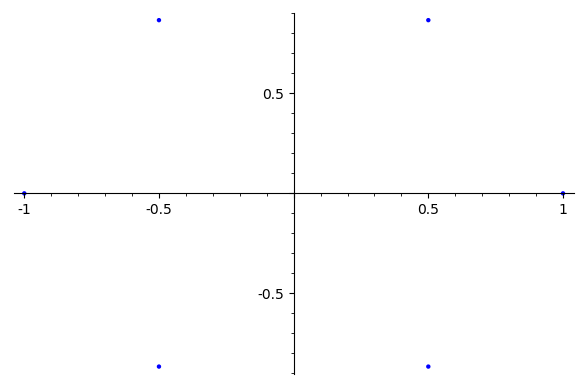

In [81]:
point(nthRoots(6))

<span class="label label-danger">Task</span> The scale on this plot is slightly skewed -- add the optional argument `aspect_ratio=1` to the `point` function call in order to make the scales on the two axes the same.

<div class="alert alert-info">
    <h3>Exercise 4.3</h3>

(a) What is the mathematical reason for giving the procedure the name `nthRoots`?

(b) Modify the code to produce a picture of the points which are given by rotations of $10^\circ$.
</div>

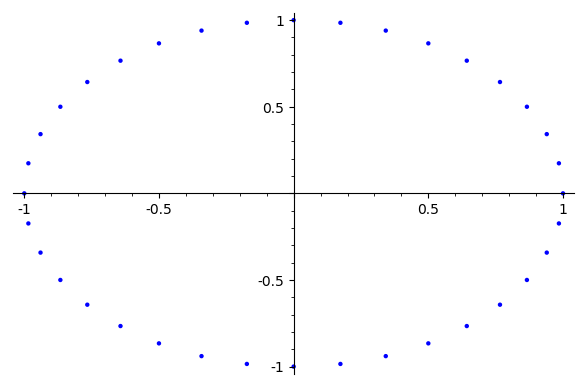

In [82]:
point(nthRoots(36))

## 5. Vector spaces over finite fields

In Workshop 1, you will be working with the finite field $\mathbf{F}_3$ (the set of integers modulo 3, with multiplication and division defined by modular arithmetic).

Sage knows this as `GF(3)`:

In [83]:
[x for x in GF(3)]

[0, 1, 2]

And Sage can do modular arithmetic too:

In [84]:
[x^2 for x in GF(3)]

[0, 1, 1]

Now in Workshop 1, you will be working with a vector space over this field; meaning vectors whose entries are from $\mathbf{F}_3$. Sage can too this, too:

In [85]:
F32 = GF(3)^2
F32.list()

[(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (2, 2)]

If you look at what type of object this is, it looks quite intimidating:

In [86]:
F32.parent()

<class 'sage.modules.free_module.FreeModule_ambient_field_with_category'>

Notice the word "Module" appearing there -- this comes up in Chapter 3, so later in the course we will be able to make sense of why Sage is saying this.

For now, let's continue with the Workshop task. Part 2(b) asks us to find the one-dimensional subspaces. Here we can find the subspace spanned by the vector `[1,0]`:

In [88]:
F32.subspace([[1,0]])

Vector space of degree 2 and dimension 1 over Finite Field of size 3
Basis matrix:
[1 0]

That doesn't look very informative, but in fact Sage does know which vectors are in this subspace:

In [89]:
F32.subspace([[1,0]]).list()

[(0, 0), (1, 0), (2, 0)]

<span class="label label-danger">Task</span> Investigate what happens when you change the `[1,0]` to `[2,0]` (and then to other elements of F32), to see if you get a new subspace.

We can use a loop to whiz through all the possibilities:

In [90]:
for v1 in F32:
    subspace = F32.subspace([v1])
    print(v1, subspace.list())

((0, 0), [(0, 0)])
((1, 0), [(0, 0), (1, 0), (2, 0)])
((2, 0), [(0, 0), (1, 0), (2, 0)])
((0, 1), [(0, 0), (0, 1), (0, 2)])
((1, 1), [(0, 0), (1, 1), (2, 2)])
((2, 1), [(0, 0), (1, 2), (2, 1)])
((0, 2), [(0, 0), (0, 1), (0, 2)])
((1, 2), [(0, 0), (1, 2), (2, 1)])
((2, 2), [(0, 0), (1, 1), (2, 2)])


Or we can use the list comprehension syntax to neatly build a list of all the subspaces:

In [91]:
list_of_subspaces = [F32.subspace([v1]) for v1 in F32 if v1 != F32.zero()]
list_of_subspaces

[Vector space of degree 2 and dimension 1 over Finite Field of size 3
 Basis matrix:
 [1 0], Vector space of degree 2 and dimension 1 over Finite Field of size 3
 Basis matrix:
 [1 0], Vector space of degree 2 and dimension 1 over Finite Field of size 3
 Basis matrix:
 [0 1], Vector space of degree 2 and dimension 1 over Finite Field of size 3
 Basis matrix:
 [1 1], Vector space of degree 2 and dimension 1 over Finite Field of size 3
 Basis matrix:
 [1 2], Vector space of degree 2 and dimension 1 over Finite Field of size 3
 Basis matrix:
 [0 1], Vector space of degree 2 and dimension 1 over Finite Field of size 3
 Basis matrix:
 [1 2], Vector space of degree 2 and dimension 1 over Finite Field of size 3
 Basis matrix:
 [1 1]]

How many different subspaces are there? For instance we can see that the first two entries are the same, so that should only count once. If we convert the list to a set (see 3.3.8 in [CMS](http://sagebook.gforge.inria.fr/english.html) for more on sets) then Sage will only keep one copy of each distinct subspace:

In [92]:
set_of_subspaces = Set(list_of_subspaces)
pretty_print(set_of_subspaces)
set_of_subspaces.cardinality()

{Vector space of degree 2 and dimension 1 over Finite Field of size 3
Basis matrix:
[1 0], Vector space of degree 2 and dimension 1 over Finite Field of size 3
Basis matrix:
[1 1], Vector space of degree 2 and dimension 1 over Finite Field of size 3
Basis matrix:
[0 1], Vector space of degree 2 and dimension 1 over Finite Field of size 3
Basis matrix:
[1 2]}

4

<div class="alert alert-info">
    <h3>Exercise 5.1</h3>

(a) Using the methods above, make a function `num1dsubspaces` that takes in `p` and `n` and returns the number of one-dimensional subspaces in $\mathbf{F}_p^n$.

(b) Use your code to help with part 4(b) in the workshop exercise, which asks how many one-dimensional subspaces are in $\mathbf{F}_3^n$. (Perhaps looking at the set of subspaces for different values of $n$ will help you to spot what is going on. You can also check the number found by Sage against your formula...)

(c) *Challenge:* Going beyond 4(b) and 4(c) in the workshop task, can you say how many subspaces are in $\mathbf{F}_p^n$?
</div>

In [2]:
def num1dsubspaces(p,n):
    F = GF(p)^n
    list_of_subspaces = [F.subspace([v1]) for v1 in F if v1 != F.zero()]
    set_of_subspaces = Set(list_of_subspaces)
    return set_of_subspaces.cardinality()

In [3]:
num1dsubspaces(7,2)

8